# Allen Brain Atlas Developing Human Brain Sample (microarray)

Author: Moshe Silverstein <br/>
Date: 3-18 <br/>
Data Source: http://www.brainspan.org/static/download.html

Reviewer: Charles Dai <br>
Updated: 6-20

In [1]:
#%%appyter init
from appyter import magic
magic.init(lambda _ = globals: _())

In [2]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import utility_functions as uf
import lookup

In [3]:
# from clustergrammer_widget import *
# net = Network(clustergrammer_widget)

In [4]:
%load_ext autoreload
%autoreload 2

### Python Version

In [5]:
sys.version

'3.8.0 (default, Oct 28 2019, 16:14:01) \n[GCC 8.3.0]'

# Initialization

### Load Mapping Dictionaries

In [6]:
symbol_lookup, geneid_lookup = lookup.get_lookups()

Gathering sources: 100%|██████████| 3/3 [00:08<00:00,  2.92s/it]


### Output Path

In [7]:
path = 'Output/ABA-DHB-MA-S'
if not os.path.exists(path):
    os.makedirs(path)

In [8]:
%%appyter hide_code
{% do SectionField(
    name = 'data',
    title = 'Load Data',
    subtitle = 'Upload files from the Developing Human Brain Sample (microarray) data set. Link: (http://www.brainspan.org/static/download.html)',
) %}

# Load Data

In [9]:
%%appyter code_exec

matrix = pd.read_csv({{FileField(
    constraint='.*\.csv$',
    name='expression_matrix', 
    label='Expression Matrix', 
    default='Input/ABA-DHB-MA-S/gene_array_matrix_csv/expression_matrix.csv',
    section='data')
}}, header=None, index_col=0)

```python

matrix = pd.read_csv('Input/ABA-DHB-MA-S/gene_array_matrix_csv/expression_matrix.csv', header=None, index_col=0)
```

In [10]:
matrix.head()

,1,2,3,4,5,6,7,8,9,10,...,483,484,485,486,487,488,489,490,491,492
0,,,,,,,,,,,,,,,,,,,,,
1,9.16596,9.35303,9.12842,9.28837,9.17170,9.52198,9.26660,9.31059,9.16732,9.12500,...,9.07099,8.77870,8.85986,8.34032,9.35445,8.70370,9.64959,8.52157,9.22952,9.64878
2,8.40401,8.43084,8.87691,8.81414,8.83160,8.56038,8.42721,8.85843,8.54096,8.34537,...,8.34760,8.45158,8.50765,8.19684,8.14229,8.54619,8.15847,8.77172,8.64942,8.18061
3,9.35942,9.58458,9.76375,9.53778,9.61363,9.37657,9.55275,9.83603,9.55960,9.36183,...,8.43173,8.54623,9.02475,8.21754,8.91127,8.77168,9.11248,8.40019,9.05908,8.82711
4,6.30357,6.73438,6.50582,7.24431,6.62531,6.96386,6.74376,6.67833,7.06941,5.86169,...,6.82257,7.54365,7.09902,6.71188,7.16314,7.18352,7.36694,6.70071,7.54916,6.78094
5,4.57404,5.22911,4.66054,5.03038,5.02629,4.77163,4.89984,5.13641,5.27419,4.73643,...,4.53204,4.72392,4.04599,5.12808,4.59776,4.47878,4.37817,4.59131,4.96854,4.35579


In [11]:
matrix.shape

(17604, 492)

## Load Sample Metadata

In [12]:
%%appyter code_exec

sample_meta = pd.read_csv({{FileField(
    constraint='.*\.csv$',
    name='columns_metadata', 
    label='Sample Metadata', 
    default='Input/ABA-DHB-MA-S/gene_array_matrix_csv/columns_metadata.csv',
    section='data')
}}, index_col=0)

In [13]:
sample_meta.head()

,donor_id,donor_name,age,gender,structure_id,structure_acronym,structure_name
column_num,,,,,,,
1,13058,H376.IIA.51,8 pcw,M,10361,AMY,amygdaloid complex
2,13058,H376.IIA.51,8 pcw,M,10552,CGE,caudal ganglionic eminence
3,13058,H376.IIA.51,8 pcw,M,10173,DFC,dorsolateral prefrontal cortex
4,13058,H376.IIA.51,8 pcw,M,10391,DTH,dorsal thalamus
5,13058,H376.IIA.51,8 pcw,M,10294,HIP,hippocampus (hippocampal formation)


In [14]:
sample_meta.shape

(492, 7)

## Load Gene Metadata

In [15]:
%%appyter code_exec

gene_meta = pd.read_csv({{FileField(
    constraint='.*\.csv$',
    name='rows_metadata', 
    label='Gene Metadata', 
    default='Input/ABA-DHB-MA-S/gene_array_matrix_csv/rows_metadata.csv',
    section='data')
}}, index_col=0)

In [16]:
gene_meta.head()

,gene_id,ensembl_gene_id,gene_symbol,entrez_id
row_num,,,,
1,9633,ENSG00000101337,TM9SF4,9777
2,22692,ENSG00000114650,SCAP,22937
3,22952,ENSG00000113194,FAF2,23197
4,34497,ENSG00000150401,DCUN1D2,55208
5,35224,ENSG00000204444,APOM,55937


In [17]:
gene_meta.shape

(17604, 4)

## Map Sample Metadata to Sample ID

In [18]:
matrix.columns = sample_meta.apply(lambda row: '_'.join([row['structure_name'], str(row['age']), row['gender'], str(row['donor_id'])]), axis=1)

In [19]:
matrix.head()

,amygdaloid complex_8 pcw_M_13058,caudal ganglionic eminence_8 pcw_M_13058,dorsolateral prefrontal cortex_8 pcw_M_13058,dorsal thalamus_8 pcw_M_13058,hippocampus (hippocampal formation)_8 pcw_M_13058,"inferolateral temporal cortex (area TEv, area 20)_8 pcw_M_13058",lateral ganglionic eminence_8 pcw_M_13058,anterior (rostral) cingulate (medial prefrontal) cortex_8 pcw_M_13058,medial ganglionic eminence_8 pcw_M_13058,primary motor-sensory cortex (samples)_8 pcw_M_13058,...,"inferolateral temporal cortex (area TEv, area 20)_40 yrs_F_12304","primary motor cortex (area M1, area 4)_40 yrs_F_12304",mediodorsal nucleus of thalamus_40 yrs_F_12304,anterior (rostral) cingulate (medial prefrontal) cortex_40 yrs_F_12304,orbital frontal cortex_40 yrs_F_12304,"primary somatosensory cortex (area S1, areas 3,1,2)_40 yrs_F_12304",posterior (caudal) superior temporal cortex (area 22c)_40 yrs_F_12304,striatum_40 yrs_F_12304,"primary visual cortex (striate cortex, area V1/17)_40 yrs_F_12304",ventrolateral prefrontal cortex_40 yrs_F_12304
0,,,,,,,,,,,,,,,,,,,,,
1,9.16596,9.35303,9.12842,9.28837,9.17170,9.52198,9.26660,9.31059,9.16732,9.12500,...,9.07099,8.77870,8.85986,8.34032,9.35445,8.70370,9.64959,8.52157,9.22952,9.64878
2,8.40401,8.43084,8.87691,8.81414,8.83160,8.56038,8.42721,8.85843,8.54096,8.34537,...,8.34760,8.45158,8.50765,8.19684,8.14229,8.54619,8.15847,8.77172,8.64942,8.18061
3,9.35942,9.58458,9.76375,9.53778,9.61363,9.37657,9.55275,9.83603,9.55960,9.36183,...,8.43173,8.54623,9.02475,8.21754,8.91127,8.77168,9.11248,8.40019,9.05908,8.82711
4,6.30357,6.73438,6.50582,7.24431,6.62531,6.96386,6.74376,6.67833,7.06941,5.86169,...,6.82257,7.54365,7.09902,6.71188,7.16314,7.18352,7.36694,6.70071,7.54916,6.78094
5,4.57404,5.22911,4.66054,5.03038,5.02629,4.77163,4.89984,5.13641,5.27419,4.73643,...,4.53204,4.72392,4.04599,5.12808,4.59776,4.47878,4.37817,4.59131,4.96854,4.35579


## Map Gene to Row

In [20]:
matrix.index = gene_meta['gene_symbol']

In [21]:
matrix.index.name = None

In [22]:
matrix.head()

,amygdaloid complex_8 pcw_M_13058,caudal ganglionic eminence_8 pcw_M_13058,dorsolateral prefrontal cortex_8 pcw_M_13058,dorsal thalamus_8 pcw_M_13058,hippocampus (hippocampal formation)_8 pcw_M_13058,"inferolateral temporal cortex (area TEv, area 20)_8 pcw_M_13058",lateral ganglionic eminence_8 pcw_M_13058,anterior (rostral) cingulate (medial prefrontal) cortex_8 pcw_M_13058,medial ganglionic eminence_8 pcw_M_13058,primary motor-sensory cortex (samples)_8 pcw_M_13058,...,"inferolateral temporal cortex (area TEv, area 20)_40 yrs_F_12304","primary motor cortex (area M1, area 4)_40 yrs_F_12304",mediodorsal nucleus of thalamus_40 yrs_F_12304,anterior (rostral) cingulate (medial prefrontal) cortex_40 yrs_F_12304,orbital frontal cortex_40 yrs_F_12304,"primary somatosensory cortex (area S1, areas 3,1,2)_40 yrs_F_12304",posterior (caudal) superior temporal cortex (area 22c)_40 yrs_F_12304,striatum_40 yrs_F_12304,"primary visual cortex (striate cortex, area V1/17)_40 yrs_F_12304",ventrolateral prefrontal cortex_40 yrs_F_12304
TM9SF4,9.16596,9.35303,9.12842,9.28837,9.17170,9.52198,9.26660,9.31059,9.16732,9.12500,...,9.07099,8.77870,8.85986,8.34032,9.35445,8.70370,9.64959,8.52157,9.22952,9.64878
SCAP,8.40401,8.43084,8.87691,8.81414,8.83160,8.56038,8.42721,8.85843,8.54096,8.34537,...,8.34760,8.45158,8.50765,8.19684,8.14229,8.54619,8.15847,8.77172,8.64942,8.18061
FAF2,9.35942,9.58458,9.76375,9.53778,9.61363,9.37657,9.55275,9.83603,9.55960,9.36183,...,8.43173,8.54623,9.02475,8.21754,8.91127,8.77168,9.11248,8.40019,9.05908,8.82711
DCUN1D2,6.30357,6.73438,6.50582,7.24431,6.62531,6.96386,6.74376,6.67833,7.06941,5.86169,...,6.82257,7.54365,7.09902,6.71188,7.16314,7.18352,7.36694,6.70071,7.54916,6.78094
APOM,4.57404,5.22911,4.66054,5.03038,5.02629,4.77163,4.89984,5.13641,5.27419,4.73643,...,4.53204,4.72392,4.04599,5.12808,4.59776,4.47878,4.37817,4.59131,4.96854,4.35579


In [23]:
matrix.shape

(17604, 492)

## Save Unfiltered Matrix to file

In [24]:
uf.saveData(matrix, path, 'aba_dev_mic_samp_matrix_unfilltered', ext='tsv', compression='gzip')

# Filtered

## Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [25]:
normalized_matrix = uf.removeAndImpute(matrix)

In [26]:
normalized_matrix.head()

,amygdaloid complex_8 pcw_M_13058,caudal ganglionic eminence_8 pcw_M_13058,dorsolateral prefrontal cortex_8 pcw_M_13058,dorsal thalamus_8 pcw_M_13058,hippocampus (hippocampal formation)_8 pcw_M_13058,"inferolateral temporal cortex (area TEv, area 20)_8 pcw_M_13058",lateral ganglionic eminence_8 pcw_M_13058,anterior (rostral) cingulate (medial prefrontal) cortex_8 pcw_M_13058,medial ganglionic eminence_8 pcw_M_13058,primary motor-sensory cortex (samples)_8 pcw_M_13058,...,"inferolateral temporal cortex (area TEv, area 20)_40 yrs_F_12304","primary motor cortex (area M1, area 4)_40 yrs_F_12304",mediodorsal nucleus of thalamus_40 yrs_F_12304,anterior (rostral) cingulate (medial prefrontal) cortex_40 yrs_F_12304,orbital frontal cortex_40 yrs_F_12304,"primary somatosensory cortex (area S1, areas 3,1,2)_40 yrs_F_12304",posterior (caudal) superior temporal cortex (area 22c)_40 yrs_F_12304,striatum_40 yrs_F_12304,"primary visual cortex (striate cortex, area V1/17)_40 yrs_F_12304",ventrolateral prefrontal cortex_40 yrs_F_12304
TM9SF4,9.16596,9.35303,9.12842,9.28837,9.17170,9.52198,9.26660,9.31059,9.16732,9.12500,...,9.07099,8.77870,8.85986,8.34032,9.35445,8.70370,9.64959,8.52157,9.22952,9.64878
SCAP,8.40401,8.43084,8.87691,8.81414,8.83160,8.56038,8.42721,8.85843,8.54096,8.34537,...,8.34760,8.45158,8.50765,8.19684,8.14229,8.54619,8.15847,8.77172,8.64942,8.18061
FAF2,9.35942,9.58458,9.76375,9.53778,9.61363,9.37657,9.55275,9.83603,9.55960,9.36183,...,8.43173,8.54623,9.02475,8.21754,8.91127,8.77168,9.11248,8.40019,9.05908,8.82711
DCUN1D2,6.30357,6.73438,6.50582,7.24431,6.62531,6.96386,6.74376,6.67833,7.06941,5.86169,...,6.82257,7.54365,7.09902,6.71188,7.16314,7.18352,7.36694,6.70071,7.54916,6.78094
APOM,4.57404,5.22911,4.66054,5.03038,5.02629,4.77163,4.89984,5.13641,5.27419,4.73643,...,4.53204,4.72392,4.04599,5.12808,4.59776,4.47878,4.37817,4.59131,4.96854,4.35579


In [27]:
normalized_matrix.shape

(17604, 492)

## Map Gene Symbols To Up-to-date Approved Gene Symbols

In [28]:
normalized_matrix = uf.mapgenesymbols(normalized_matrix, symbol_lookup)

100%|██████████| 17604/17604 [00:00<00:00, 484596.58it/s]


In [29]:
normalized_matrix.shape

(17369, 492)

### Merge Duplicate Genes By Rows

In [30]:
normalized_matrix = uf.merge(normalized_matrix, 'row', 'mean')

In [31]:
normalized_matrix.shape

(16632, 492)

### Merge Like Column (by taking the mean)

In [32]:
normalized_matrix = uf.merge(normalized_matrix, 'column', 'mean')

In [33]:
normalized_matrix.shape

(16632, 492)

## Log2 Transform

In [34]:
normalized_matrix = uf.log2(normalized_matrix)

In [35]:
normalized_matrix.head()

,amygdaloid complex_1 yrs_F_12830,amygdaloid complex_12 pcw_F_12835,amygdaloid complex_12 pcw_F_12960,amygdaloid complex_12 pcw_F_13060,amygdaloid complex_13 pcw_M_12820,amygdaloid complex_13 pcw_M_12888,amygdaloid complex_13 yrs_F_12831,amygdaloid complex_15 yrs_M_12299,amygdaloid complex_16 pcw_M_12837,amygdaloid complex_16 pcw_M_12879,...,ventrolateral prefrontal cortex_3 yrs_F_12836,ventrolateral prefrontal cortex_3 yrs_M_12980,ventrolateral prefrontal cortex_30 yrs_F_12290,ventrolateral prefrontal cortex_36 yrs_M_12302,ventrolateral prefrontal cortex_37 yrs_M_12303,ventrolateral prefrontal cortex_4 mos_M_12296,ventrolateral prefrontal cortex_4 yrs_M_12298,ventrolateral prefrontal cortex_40 yrs_F_12304,ventrolateral prefrontal cortex_8 pcw_M_13058,ventrolateral prefrontal cortex_8 yrs_M_12841
index,,,,,,,,,,,,,,,,,,,,,
A1BG,2.725111,2.645178,2.678590,2.740850,2.658614,2.553299,2.703362,2.679541,2.685086,2.644973,...,2.751616,2.598784,2.687352,2.686657,2.726203,2.694472,2.762672,2.572851,2.508715,2.613265
A1CF,2.305883,2.224865,2.261097,2.339209,2.267865,2.227387,2.359038,2.272946,2.357932,2.251443,...,2.373715,2.304289,2.349178,2.318531,2.421388,2.341152,2.363583,2.286825,2.319765,2.262292
A2M,3.499144,3.229619,3.238593,3.184512,3.043236,3.246705,3.352853,3.424921,3.276562,3.306929,...,3.430180,3.421958,3.460441,3.439243,3.469078,3.456170,3.466797,3.319387,3.321482,3.405954
A2ML1,2.536926,2.159464,2.221985,2.268126,2.161546,2.153468,2.426528,2.392510,2.296924,2.165684,...,2.367796,2.512202,2.430034,2.336215,2.412971,2.420596,2.441391,2.305682,2.173243,2.451762
A4GALT,2.450781,2.549324,2.446754,2.620075,2.394972,2.365704,2.605622,2.552672,2.403011,2.351563,...,2.448074,2.390902,2.608755,2.328268,2.492674,2.510137,2.470076,2.440684,2.405701,2.546714


## Normalize Matrix (Quantile Normalize the matrix for the columns)

In [36]:
normalized_matrix = uf.quantileNormalize(normalized_matrix)

In [37]:
normalized_matrix.head()

,amygdaloid complex_1 yrs_F_12830,amygdaloid complex_12 pcw_F_12835,amygdaloid complex_12 pcw_F_12960,amygdaloid complex_12 pcw_F_13060,amygdaloid complex_13 pcw_M_12820,amygdaloid complex_13 pcw_M_12888,amygdaloid complex_13 yrs_F_12831,amygdaloid complex_15 yrs_M_12299,amygdaloid complex_16 pcw_M_12837,amygdaloid complex_16 pcw_M_12879,...,ventrolateral prefrontal cortex_3 yrs_F_12836,ventrolateral prefrontal cortex_3 yrs_M_12980,ventrolateral prefrontal cortex_30 yrs_F_12290,ventrolateral prefrontal cortex_36 yrs_M_12302,ventrolateral prefrontal cortex_37 yrs_M_12303,ventrolateral prefrontal cortex_4 mos_M_12296,ventrolateral prefrontal cortex_4 yrs_M_12298,ventrolateral prefrontal cortex_40 yrs_F_12304,ventrolateral prefrontal cortex_8 pcw_M_13058,ventrolateral prefrontal cortex_8 yrs_M_12841
index,,,,,,,,,,,,,,,,,,,,,
A1BG,2.715565,2.663057,2.695680,2.721134,2.687498,2.605538,2.675975,2.680886,2.685670,2.669585,...,2.751149,2.603520,2.687733,2.690881,2.711481,2.682576,2.737865,2.589628,2.564353,2.593766
A1CF,2.276119,2.286190,2.324774,2.295247,2.320630,2.313985,2.298526,2.296174,2.374481,2.335244,...,2.369077,2.333924,2.385338,2.303155,2.358476,2.288127,2.332994,2.327022,2.390866,2.264900
A2M,3.506836,3.198563,3.203586,3.195329,3.017600,3.213754,3.383717,3.412264,3.282852,3.286736,...,3.432457,3.458219,3.455712,3.450459,3.500990,3.464608,3.465714,3.308774,3.285233,3.401113
A2ML1,2.519221,2.209131,2.283973,2.230376,2.181700,2.211133,2.366828,2.403155,2.305122,2.228743,...,2.364498,2.522690,2.460502,2.320709,2.348831,2.368711,2.411732,2.346044,2.208455,2.443271
A4GALT,2.425768,2.576282,2.493759,2.584065,2.455269,2.451950,2.564933,2.549018,2.417726,2.434704,...,2.446810,2.412835,2.617994,2.312233,2.435505,2.474993,2.443638,2.473055,2.472757,2.530160


## Normalize Matrix (z-score the rows)

In [38]:
normalized_matrix = uf.zscore(normalized_matrix, 'row')

In [39]:
normalized_matrix.head()

,amygdaloid complex_1 yrs_F_12830,amygdaloid complex_12 pcw_F_12835,amygdaloid complex_12 pcw_F_12960,amygdaloid complex_12 pcw_F_13060,amygdaloid complex_13 pcw_M_12820,amygdaloid complex_13 pcw_M_12888,amygdaloid complex_13 yrs_F_12831,amygdaloid complex_15 yrs_M_12299,amygdaloid complex_16 pcw_M_12837,amygdaloid complex_16 pcw_M_12879,...,ventrolateral prefrontal cortex_3 yrs_F_12836,ventrolateral prefrontal cortex_3 yrs_M_12980,ventrolateral prefrontal cortex_30 yrs_F_12290,ventrolateral prefrontal cortex_36 yrs_M_12302,ventrolateral prefrontal cortex_37 yrs_M_12303,ventrolateral prefrontal cortex_4 mos_M_12296,ventrolateral prefrontal cortex_4 yrs_M_12298,ventrolateral prefrontal cortex_40 yrs_F_12304,ventrolateral prefrontal cortex_8 pcw_M_13058,ventrolateral prefrontal cortex_8 yrs_M_12841
index,,,,,,,,,,,,,,,,,,,,,
A1BG,0.270943,-0.642737,-0.075076,0.367838,-0.217446,-1.643601,-0.417945,-0.332505,-0.249246,-0.529135,...,0.890110,-1.678716,-0.213358,-0.158583,0.199880,-0.303085,0.658966,-1.920440,-2.360244,-1.848440
A1CF,-1.469299,-1.222837,-0.278543,-1.001173,-0.379953,-0.542598,-0.920940,-0.978482,0.937957,-0.022306,...,0.805719,-0.054618,1.203669,-0.807649,0.546258,-1.175427,-0.077364,-0.223531,1.338956,-1.743880
A2M,0.880160,-1.116032,-1.083510,-1.136977,-2.287840,-1.017665,0.082914,0.267766,-0.570225,-0.545076,...,0.398529,0.565349,0.549111,0.515100,0.842306,0.606718,0.613879,-0.402372,-0.554806,0.195563
A2ML1,1.939631,-0.831799,-0.162899,-0.641920,-1.076964,-0.813902,0.577613,0.902291,0.026120,-0.656518,...,0.556788,1.970633,1.414826,0.165425,0.416766,0.594444,0.978943,0.391858,-0.837844,1.260820
A4GALT,-0.744454,1.418322,0.232522,1.530151,-0.320552,-0.368243,1.255245,1.026554,-0.860017,-0.616060,...,-0.442103,-0.930298,2.017689,-2.375871,-0.604548,-0.037129,-0.487687,-0.064982,-0.069259,0.755573


## Histogram of First Sample

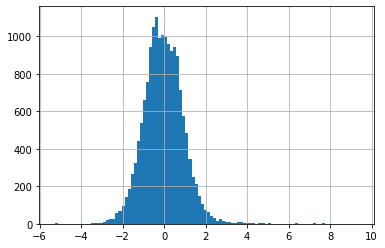

In [40]:
normalized_matrix[normalized_matrix.columns[0]].hist(bins=100)

## Histogram of First Gene

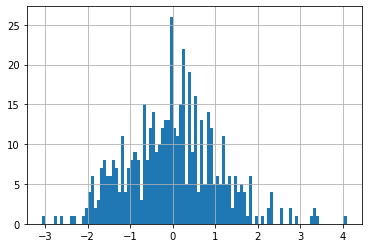

In [41]:
normalized_matrix.loc[normalized_matrix.index[0]].hist(bins=100)

### Save Filtered Matrix

In [42]:
uf.saveData(normalized_matrix, path, 'aba_dev_mic_samp_matrix_filltered', ext='tsv', compression='gzip')

## Create Gene List

In [43]:
gene_list = uf.createGeneList(normalized_matrix, geneid_lookup)

100%|██████████| 16632/16632 [00:00<00:00, 286280.41it/s]


In [44]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A4GALT,53947


In [45]:
gene_list.shape

(16632, 2)

### Save Gene List

In [46]:
uf.saveData(gene_list, path, 'aba_dev_mic_samp_gene_list', ext='tsv', compression='gzip', index=False)

## Create Attribute List

In [47]:
attribute_list = uf.createAttributeList(normalized_matrix)

In [48]:
attribute_list.head()

""
Attributes
amygdaloid complex_1 yrs_F_12830
amygdaloid complex_12 pcw_F_12835
amygdaloid complex_12 pcw_F_12960
amygdaloid complex_12 pcw_F_13060
amygdaloid complex_13 pcw_M_12820


In [49]:
attribute_list.shape

(492, 0)

### Save Attribute List

In [50]:
uf.saveData(attribute_list, path, 'aba_dev_mic_samp_attribute_list', ext='tsv', compression='gzip')

## Create matrix of Standardized values (values between -1, and 1)

In [51]:
standard_matrix = uf.createStandardizedMatrix(normalized_matrix)

100%|██████████| 16632/16632 [00:02<00:00, 7584.37it/s]


In [52]:
standard_matrix.head()

Attributes,amygdaloid complex_1 yrs_F_12830,amygdaloid complex_12 pcw_F_12835,amygdaloid complex_12 pcw_F_12960,amygdaloid complex_12 pcw_F_13060,amygdaloid complex_13 pcw_M_12820,amygdaloid complex_13 pcw_M_12888,amygdaloid complex_13 yrs_F_12831,amygdaloid complex_15 yrs_M_12299,amygdaloid complex_16 pcw_M_12837,amygdaloid complex_16 pcw_M_12879,...,ventrolateral prefrontal cortex_3 yrs_F_12836,ventrolateral prefrontal cortex_3 yrs_M_12980,ventrolateral prefrontal cortex_30 yrs_F_12290,ventrolateral prefrontal cortex_36 yrs_M_12302,ventrolateral prefrontal cortex_37 yrs_M_12303,ventrolateral prefrontal cortex_4 mos_M_12296,ventrolateral prefrontal cortex_4 yrs_M_12298,ventrolateral prefrontal cortex_40 yrs_F_12304,ventrolateral prefrontal cortex_8 pcw_M_13058,ventrolateral prefrontal cortex_8 yrs_M_12841
index,,,,,,,,,,,,,,,,,,,,,
A1BG,0.232218,-0.466920,-0.088902,0.280991,-0.202713,-0.881290,-0.320544,-0.275850,-0.218956,-0.401880,...,0.626519,-0.897540,-0.198641,-0.157979,0.159051,-0.267732,0.480106,-0.946219,-0.986795,-0.925947
A1CF,-0.910226,-0.820868,-0.256032,-0.699005,-0.329194,-0.443023,-0.654305,-0.674617,0.601607,-0.032494,...,0.552811,-0.060945,0.731827,-0.589306,0.378022,-0.788394,-0.073142,-0.207253,0.788762,-0.971084
A2M,0.798570,-0.672946,-0.644504,-0.697326,-0.989681,-0.595747,0.058635,0.176490,-0.331570,-0.299060,...,0.318755,0.469113,0.452846,0.416299,0.774177,0.526046,0.546389,-0.217783,-0.311253,0.119614
A2ML1,0.948491,-0.714309,-0.120982,-0.559939,-0.917409,-0.689935,0.362709,0.541543,0.017247,-0.568059,...,0.342375,0.956620,0.805950,0.090379,0.265159,0.378952,0.598465,0.232641,-0.726500,0.728680
A4GALT,-0.527211,0.834703,0.188142,0.867253,-0.250832,-0.291481,0.793981,0.712649,-0.588154,-0.445918,...,-0.328045,-0.616597,0.940560,-0.957747,-0.441861,-0.031329,-0.368662,-0.047549,-0.055724,0.553962


## Plot of A Single Celltype, Normalized Value vs. Standardized Value

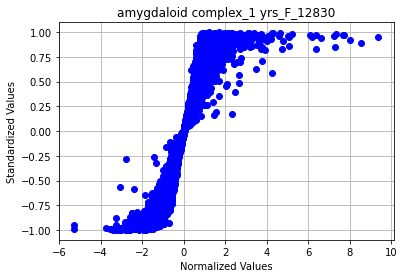

In [53]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

### Save Standardized Matrix

In [54]:
uf.saveData(standard_matrix, path, 'aba_dev_mic_samp_standard_matrix', ext='tsv', compression='gzip')

## Create Tertiary Matrix

In [55]:
tertiary_matrix = uf.createTertiaryMatrix(standard_matrix)

In [56]:
tertiary_matrix.head()

Attributes,amygdaloid complex_1 yrs_F_12830,amygdaloid complex_12 pcw_F_12835,amygdaloid complex_12 pcw_F_12960,amygdaloid complex_12 pcw_F_13060,amygdaloid complex_13 pcw_M_12820,amygdaloid complex_13 pcw_M_12888,amygdaloid complex_13 yrs_F_12831,amygdaloid complex_15 yrs_M_12299,amygdaloid complex_16 pcw_M_12837,amygdaloid complex_16 pcw_M_12879,...,ventrolateral prefrontal cortex_3 yrs_F_12836,ventrolateral prefrontal cortex_3 yrs_M_12980,ventrolateral prefrontal cortex_30 yrs_F_12290,ventrolateral prefrontal cortex_36 yrs_M_12302,ventrolateral prefrontal cortex_37 yrs_M_12303,ventrolateral prefrontal cortex_4 mos_M_12296,ventrolateral prefrontal cortex_4 yrs_M_12298,ventrolateral prefrontal cortex_40 yrs_F_12304,ventrolateral prefrontal cortex_8 pcw_M_13058,ventrolateral prefrontal cortex_8 yrs_M_12841
index,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
A2M,0,0,0,0,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
A4GALT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0


### Save Teriary Matrix

In [57]:
uf.saveData(tertiary_matrix, path, 'aba_dev_mic_samp_tertiary_matrix', ext='tsv', compression='gzip')

# Create Gene and Attribute Set Libraries

In [58]:
uf.createUpGeneSetLib(tertiary_matrix, path, 'aba_dev_mic_samp_gene_up_set')

100%|██████████| 492/492 [00:00<00:00, 4276.11it/s]


In [59]:
uf.createDownGeneSetLib(tertiary_matrix, path, 'aba_dev_mic_samp_gene_down_set')

100%|██████████| 492/492 [00:00<00:00, 4423.72it/s]


In [60]:
uf.createUpAttributeSetLib(tertiary_matrix, path, 'aba_dev_mic_samp_attribute_up_set')

100%|██████████| 16632/16632 [00:00<00:00, 26893.79it/s]


In [61]:
uf.createDownAttributeSetLib(tertiary_matrix, path, 'aba_dev_mic_samp_attribute_down_set')

100%|██████████| 16632/16632 [00:00<00:00, 26743.27it/s]


## Create Attribute Similarity matrix

In [62]:
attribute_similarity_matrix = uf.createSimilarityMatrix(normalized_matrix.T, 'cosine')

In [63]:
attribute_similarity_matrix.head()

,amygdaloid complex_1 yrs_F_12830,amygdaloid complex_12 pcw_F_12835,amygdaloid complex_12 pcw_F_12960,amygdaloid complex_12 pcw_F_13060,amygdaloid complex_13 pcw_M_12820,amygdaloid complex_13 pcw_M_12888,amygdaloid complex_13 yrs_F_12831,amygdaloid complex_15 yrs_M_12299,amygdaloid complex_16 pcw_M_12837,amygdaloid complex_16 pcw_M_12879,...,ventrolateral prefrontal cortex_3 yrs_F_12836,ventrolateral prefrontal cortex_3 yrs_M_12980,ventrolateral prefrontal cortex_30 yrs_F_12290,ventrolateral prefrontal cortex_36 yrs_M_12302,ventrolateral prefrontal cortex_37 yrs_M_12303,ventrolateral prefrontal cortex_4 mos_M_12296,ventrolateral prefrontal cortex_4 yrs_M_12298,ventrolateral prefrontal cortex_40 yrs_F_12304,ventrolateral prefrontal cortex_8 pcw_M_13058,ventrolateral prefrontal cortex_8 yrs_M_12841
amygdaloid complex_1 yrs_F_12830,1.000000,-0.262122,-0.272441,-0.142742,-0.242700,-0.202992,0.328261,0.364504,-0.157340,-0.167891,...,0.099634,0.150244,0.313865,0.233352,0.279834,0.445028,0.367215,0.119327,-0.165641,0.187383
amygdaloid complex_12 pcw_F_12835,-0.262122,1.000000,0.696693,0.589616,0.545489,0.781306,-0.278453,-0.149590,0.493685,0.489181,...,-0.091545,-0.202196,-0.317050,-0.281756,-0.315559,-0.328797,-0.284884,-0.199692,0.651732,-0.147987
amygdaloid complex_12 pcw_F_12960,-0.272441,0.696693,1.000000,0.576468,0.467710,0.690928,-0.300917,-0.151825,0.418740,0.612479,...,-0.071239,-0.240482,-0.321138,-0.277578,-0.358798,-0.261984,-0.311210,-0.142789,0.488336,-0.221078
amygdaloid complex_12 pcw_F_13060,-0.142742,0.589616,0.576468,1.000000,0.339033,0.517813,-0.113417,-0.099477,0.327872,0.349417,...,-0.162617,-0.348187,-0.338662,-0.273732,-0.175381,-0.136461,-0.204553,-0.277991,0.393716,-0.197744
amygdaloid complex_13 pcw_M_12820,-0.242700,0.545489,0.467710,0.339033,1.000000,0.576802,-0.328089,-0.284593,0.456209,0.486158,...,-0.241058,-0.212132,-0.298725,-0.234497,-0.271302,-0.208777,-0.347755,-0.235129,0.602542,-0.338441


### Save Attribute Similarity Matrix

In [64]:
uf.saveData(attribute_similarity_matrix, path, 'aba_dev_mic_samp_attribute_similarity_matrix', ext='tsv', compression='gzip')

In [65]:
# net.load_df(attribute_similarity_matrix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
# net.cluster()
# net.widget()

## Create Gene Similarity Matrix

In [66]:
gene_similarity_matrix = uf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [67]:
gene_similarity_matrix.head()

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
A1BG,1.000000,0.185815,0.014997,-0.001747,-0.064419,0.316284,-0.049332,0.164579,0.007858,0.082926,...,-0.104433,-0.314975,0.029593,0.131326,0.009245,0.044971,0.103020,-0.000625,0.156140,-0.158334
A1CF,0.185815,1.000000,0.134835,0.206780,-0.085357,0.114068,-0.148840,0.048209,0.071731,0.117797,...,-0.186133,-0.215873,-0.102772,0.115889,-0.010922,-0.041731,-0.013728,0.010092,0.044584,-0.188813
A2M,0.014997,0.134835,1.000000,0.656193,0.042852,0.076454,-0.671098,0.207111,-0.070247,0.153043,...,-0.717365,-0.472863,-0.609211,0.256587,-0.180642,-0.303319,-0.358284,-0.106522,-0.375481,-0.599736
A2ML1,-0.001747,0.206780,0.656193,1.000000,-0.129028,0.044586,-0.642821,0.262530,0.030920,0.173836,...,-0.704019,-0.382627,-0.637213,0.295739,0.012145,-0.259690,-0.277074,-0.202407,-0.352674,-0.608102
A4GALT,-0.064419,-0.085357,0.042852,-0.129028,1.000000,-0.164112,0.168868,-0.179661,-0.210887,-0.225586,...,0.162842,0.140975,0.124632,0.021959,-0.240770,-0.051991,-0.129732,0.034311,-0.164203,0.101646


### Save Gene Similarity Matrix

In [68]:
uf.saveData(gene_similarity_matrix, path, 'aba_dev_mic_samp_gene_similarity_matrix', compression='npz', axes=('gene', 'gene'), symmetric=True, dtype=np.float32)

## Create Gene-Attribute Edge List

In [69]:
uf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, 'aba_dev_mic_samp_gene_attribute_edge_list')

The number of statisticaly relevent gene-attribute associations is: 409103


# Create Downloadable Save File

In [70]:
uf.createArchive(path)

### Link to download output files: [click here](./output_archive.zip)